> ## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

df.shape

(5000, 14)

In [4]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.1', 'target'],
      dtype='object')

## Finding unique values in categorical lists

In [5]:
cat_list = ['f2','f3','f6','f8','f9','f10']

# to find unique value in each column
for i in cat_list:
    print(i,df[i].unique())
    print('**************************************')

f2 ['x']
**************************************
f3 ['y']
**************************************
f6 ['gamma' 'alpha' 'beta' 'omega']
**************************************
f8 [ 0. 35. 20. 15. 32. 40. 45.]
**************************************
f9 [0 1 2]
**************************************
f10 ['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73']
**************************************


### Remove Columns

In [6]:
df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','f2','f3','f10'],axis=1,inplace=True)
df.head()

,f1,f4,f5,f6,f7,f8,f9,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


### Type Casting

In [7]:
# First Method
from datetime import date, datetime

df['f1'] = pd.to_datetime(df['f1'])
df['f4'] = pd.to_datetime(df['f4'])
df['f5'] = pd.to_datetime(df['f5'])

df.insert(0,'time_to_dep(s)',((df['f4']-df['f1']).astype('timedelta64[s]')),True)
df.insert(1,'travel_time(s)',((df['f5']-df['f4']).astype('timedelta64[s]')),True)

df.head()
# also remove f1+f4+f5    Because i already collected data

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [8]:
'''
# Second Method 
date_format_str = '%Y/%m/%d %H:%M:%S.%f'

df['f1'] = pd.to_datetime(df['f1'])
df['f4'] = pd.to_datetime(df['f4'])

f1 = pd.to_datetime(df['f1'], date_format_str)
f4 = pd.to_datetime(df['f4'], date_format_str)
diff = f4-f1
df['delta'] = diff
'''
'''
# functions to calculate time
def convert(seconds):
    seconds  = seconds %  (24 * 3600)
    hour     = seconds // 3600
    seconds %= 3600 
    minutes  = seconds // 60 
    seconds %= 60
    return '%d:%02d:%02d' % (hour,minutes,seconds)
    
# Column addition
df['time_1] = df['time_to_dep(s)'].apply(convert)
df['time_2] = df['travel_time(s)'].apply(convert)
'''

"\n# functions to calculate time\ndef convert(seconds):\n    seconds  = seconds %  (24 * 3600)\n    hour     = seconds // 3600\n    seconds %= 3600 \n    minutes  = seconds // 60 \n    seconds %= 60\n    return '%d:%02d:%02d' % (hour,minutes,seconds)\n    \n# Column addition\ndf['time_1] = df['time_to_dep(s)'].apply(convert)\ndf['time_2] = df['travel_time(s)'].apply(convert)\n"

In [9]:
cat_cols = ['f6','f7','f8','f9']  # Cetagorical
num_cols = ['time_to_dep(s)',"travel_time(s)"] # Numaric

### Plotting Cetagorical

In [10]:
'''
c = 1
plt.figure(figsize=(10,30))
for i in cat_cols:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
  # plt.xticks(rotaion=90)
  # plt.tight_layout(pad=3.0)
    c = c+1
'''

'\nc = 1\nplt.figure(figsize=(10,30))\nfor i in cat_cols:\n    plt.subplot(6,3,c)\n    sns.countplot(df[i])\n  # plt.xticks(rotaion=90)\n  # plt.tight_layout(pad=3.0)\n    c = c+1\n'

### Plotting Numaric

C:\Users\MOIZ\AppData\Local\Temp\ipykernel_9260\3686694817.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\MOIZ\AppData\Local\Temp\ipykernel_9260\3686694817.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


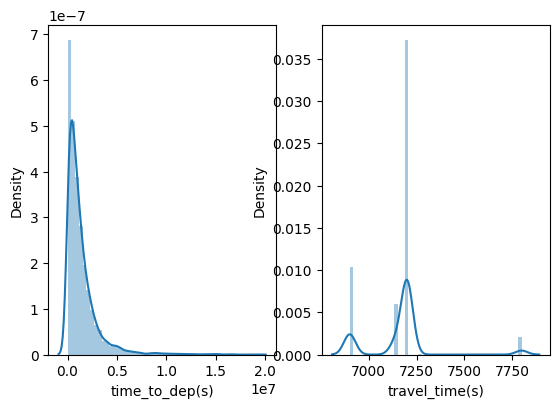

In [11]:
c = 1
plt.figure(figsize=(10,30))
for i in num_cols:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
  # plt.xticks(rotaion=90)
  # plt.tight_layout(pad=3.0)
    c = c+1

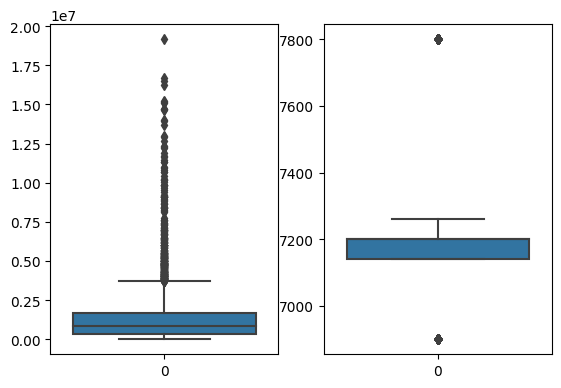

In [12]:
c = 1
plt.figure(figsize=(10,30))
for i in num_cols:
    plt.subplot(6,3,c)
    sns.boxplot(df[i])
  # plt.xticks(rotaion=90)
  # plt.tight_layout(pad=3.0)
    c = c+1

Plotting Target(y)

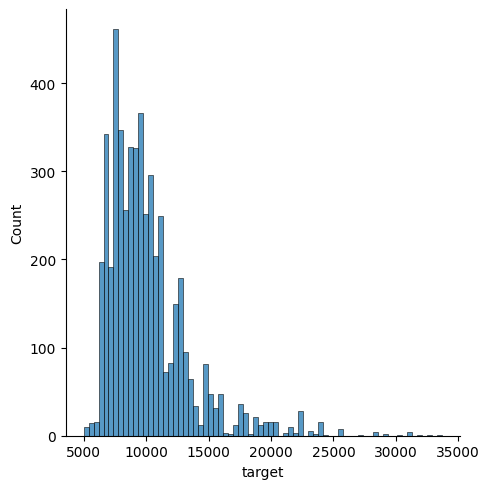

In [13]:
sns.displot(df.target)

<AxesSubplot: >

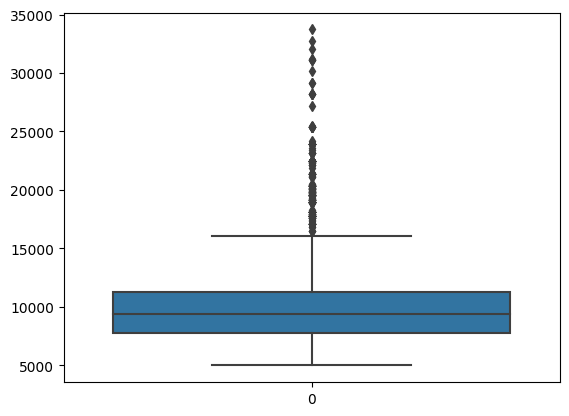

In [14]:
sns.boxplot(df.target)

# Remove outlayers according to data

### Skew & Kutosis

In [15]:
df.skew()
df.kurtosis()

# Remove outlayers by analyzing this

C:\Users\MOIZ\AppData\Local\Temp\ipykernel_9260\3481392468.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()
C:\Users\MOIZ\AppData\Local\Temp\ipykernel_9260\3481392468.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


time_to_dep(s)     20.796049
travel_time(s)      5.504109
f7                134.031335
f8                  0.046374
f9                 -0.310364
target              6.344666
dtype: float64

> # **Encoding of Variables**

In [16]:
df.drop(['f1','f4','f5'],axis=1,inplace=True)
df.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
0,1268192.0,7200.0,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,beta,True,20.0,0,6500.0


### Convert into (0,1,2) for Machine Learning

In [17]:
from sklearn.preprocessing import LabelEncoder
df['f6'] = LabelEncoder().fit_transform(df['f6'])
df['f7'] = LabelEncoder().fit_transform(df['f7'])
df['f8'] = LabelEncoder().fit_transform(df['f8'])

df.sample(10)

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
4922,1034175.0,7200.0,2,1,2,2,14130.0
4979,297640.0,7200.0,0,1,1,1,7900.0
4360,429049.0,7200.0,2,1,2,1,8750.0
1800,500660.0,7200.0,0,1,4,1,5996.0
1815,674149.0,7800.0,0,1,0,0,8739.0
797,245614.0,6900.0,1,0,2,0,8697.0
324,741754.0,7200.0,0,1,0,0,8739.0
1413,1295362.0,7200.0,0,1,2,1,10545.0
4615,1519533.0,6900.0,1,1,2,0,7222.0
1977,3217094.0,7200.0,0,1,4,1,8605.0


In [18]:
df.describe()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.349212e+06,7159.836000,0.953400,0.992800,2.292000,0.944600,10104.351800
std,1.679384e+06,169.613345,0.948371,0.084555,1.247817,0.607951,3359.936118
min,2.003000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.606870e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7796.000000
50%,8.634945e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.698816e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,11245.000000
max,1.916464e+07,7800.000000,3.000000,1.000000,6.000000,2.000000,33720.000000


### Scaling Data (Only in Numaric For Normalizing)

In [19]:
'''
from sklearn.preprocessing import StandardScaler
df['time_to_dep(s)'] = StandardScaler().fit_transform(df['time_to_dep(s)'])
df['travel_time(s)'] = StandardScaler().fit_transform(df['travel_time(s)'])
df['target'] = StandardScaler().fit_transform(df['target'])
'''

"\nfrom sklearn.preprocessing import StandardScaler\ndf['time_to_dep(s)'] = StandardScaler().fit_transform(df['time_to_dep(s)'])\ndf['travel_time(s)'] = StandardScaler().fit_transform(df['travel_time(s)'])\ndf['target'] = StandardScaler().fit_transform(df['target'])\n"

> # **Machine Learning**

In [20]:
X = df[['time_to_dep(s)','travel_time(s)','f6','f7','f8','f9']]
y = df['target']

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
lr = LinearRegression()
dt = DecisionTreeClassifier()
svr = SVR()
knn = KNeighborsClassifier()

In [23]:
from statistics import mean


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

for i in [lr,dt,svr,knn]:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    test_score = r2_score(y_test,pred)
    train_score= r2_score(y_train, i.predict(X_train))
    if abs(train_score-test_score) <=0.1 :
        print(i)
        print('R2_Score is: ',r2_score(y_test,pred))
        print('Mean Absolute Error is: ',mean_absolute_error(y_test,pred))
        print('Mean Squared Error is: ',mean_squared_error(y_test,pred))
        print('Root Mean Squared Error is: ',mean_squared_error(y_test,pred, squared=False))
        print('***************************************************************************')

LinearRegression()
R2_Score is:  0.0824576968227253
Mean Absolute Error is:  2175.6552919422875
Mean Squared Error is:  9604880.483617561
Root Mean Squared Error is:  3099.1741615497444
***************************************************************************
SVR()
R2_Score is:  -0.06121290745272212
Mean Absolute Error is:  2234.394635530172
Mean Squared Error is:  11108831.830924733
Root Mean Squared Error is:  3332.991423770054
***************************************************************************


In [24]:
lr = LinearRegression().fit(X,y)
pred = lr.predict(X_test)

In [25]:
# To Save Prediction
res = pd.DataFrame(pred)
res.index = X_test.index    # Its important for comparison
res.columns = ['prediction']
res.to_csv = ('prediction_results.csv')